In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [2]:
df = pd.read_parquet('/Users/paddy/Documents/GitHub/Masterthesis_ML/data/03_30min_dataset.parquet')

# # Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# set date as index
df_1day = df.set_index('date')

In [3]:
# """ # making intervals of 1 day
# df_1day = (pd.to_datetime(df['tpep_pickup_datetime'], unit='min')
#     .dt.floor('60min') 
#     .value_counts()
#     .rename_axis('date')
#     .reset_index(name='rides')
# ) """

#df_1day = df_1day.resample('H').size()

# sort by date
#df_1day = df_1day.sort_values(by='date')



In [4]:
print(df_1day.head())

                           count
date                            
2022-04-01 00:00:00+00:00      9
2022-04-01 00:30:00+00:00     17
2022-04-01 01:00:00+00:00      8
2022-04-01 01:30:00+00:00      7
2022-04-01 02:00:00+00:00      4


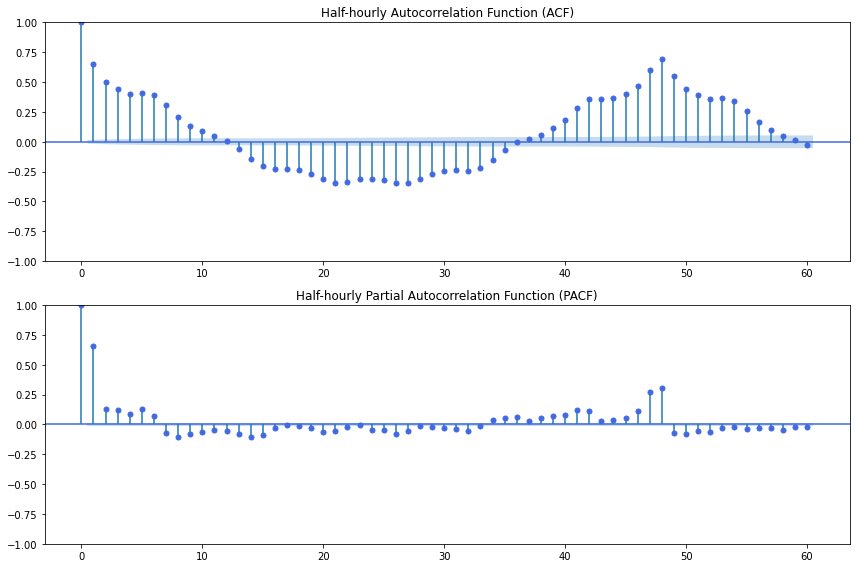

In [5]:
# Recreate the ACF and PACF plots with royal blue color for lines and dots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot with royal blue color
sm.graphics.tsa.plot_acf(df_1day, lags=60, ax=ax1, color='royalblue')
ax1.set_title('Half-hourly Autocorrelation Function (ACF)')

# PACF plot with royal blue color
sm.graphics.tsa.plot_pacf(df_1day, lags=60, ax=ax2, color='royalblue')
ax2.set_title('Half-hourly Partial Autocorrelation Function (PACF)')

plt.tight_layout()

#safe plot
plt.savefig('/Users/paddy/Documents/GitHub/Masterthesis_ML/plots/02_acf_pacf_30min.png')

plt.show()